# Data science pipeline: pandas, seaborn, sckit-learn

## Agenda
- How do I use the **pandas library** to read data into Python
- How do I use the **seaborn library** to visualize data
- What is **linear regression** and how does it work
- How do I **train and interpret** a linear regression model in sklearn
- What are some **evaluation metrics** for regrssion problems
- How do I choose **which features to include** in my model

## Types of supervised learning
- **Classification**: Predict a categorical response
- **Regression**: Predict a continous response

In [27]:
# convention way to import pandas
import pandas as pd


In [28]:
# read CSV file directly from a URL and save the results
data = pd.read_csv('Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Primary object types:
- **DataFrame**: rows and columns (like a spread sheet)
- **Series**: a single column

In [8]:
# display the last 5 rows
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [9]:
# Check the shape of the DataFrame(rows,cols)
data.shape

(200, 4)

What are the features?
- **TV**: advertising dollars spent on the TV for a single product in a given market(in thousand of dollars)
- **Radio**: advertisng dollars spent on Radio
- **Newspaper**: advertising dollars spent on Newspaper

What is the response?
- **Sales**: sales of a single product in a given market(in thousand of items)

What else do we know?
- Becaues the response variable is continous, this is a **regression** problems
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data using seaborn
- To get better understanding at the data

In [29]:
# convention way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

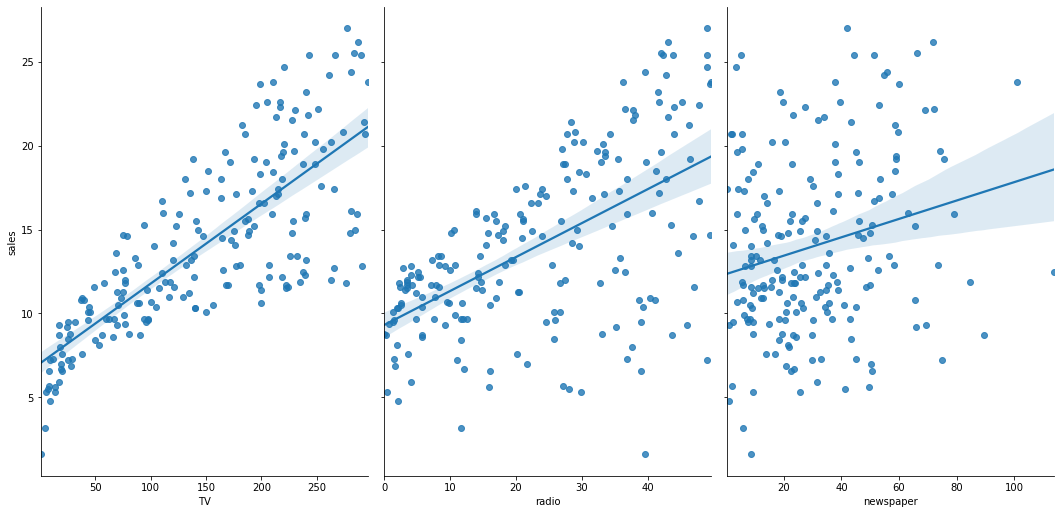

In [30]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','radio','newspaper'], 
             y_vars='sales', height=7, aspect=0.7, kind='reg')

## Linear Regression
**Pros**: no tuning required, highly interpreted, well-understood
**Cons**: unlikely to produce the best predictive accuracy ( presumes a linear relationship between the features and response)

### Form of linear regression
$$ y = \beta_0 + \beta_1x_1 + ...  \beta_nx_n$$
- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (first feature)
- $\beta_n$ is the coefficient for $x_n$ (the n_feautre)

In this case:

$y = \beta_0 + \beta_1 x TV + \beta_2 x radio + \beta_3 x newspaper$

the $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

### Prepairing X and y using pandas
- sckit-learn expects X (feature matrix) and y (response vector) to be Numpy array
- However, pandas is built on top of Numpy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series

In [31]:
# create a Python list of feature names
feature_cols = ['TV','radio','newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# print yhe first 5 rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [32]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [33]:
# select a Series from the DataFrame
y = data['sales']

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [14]:
# check the type and shape of y
print(y.shape)
print(type(y))

(200,)
<class 'pandas.core.series.Series'>


## Splitting X and y into training and testing sets

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [35]:
# defualt split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## Linear regression in scikit-learn

In [36]:
# import sckit-learn
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn cofficients)
linreg.fit(X_train,y_train)

LinearRegression()

### Interpreting model coefficients

In [37]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [38]:
# pair the feature names with the coefficients
list(zip(feature_cols,linreg.coef_))

[('TV', 0.04656456787415028),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111804347)]

$$ y = 2.88+0.466 x TV + 0.179 x radio + 0.00345 x newspaper$$

How do we interpret the **TV coefficient**(0.0466)?
- For a given amount of Radio and Newspaper ad spending, **a "unit" increase in TV ad spending** is associated with a **0.0466 "unit" increase in Sales** 
- Or more clearly: For a given amount of Radio and Newspaper ad spending, **an additional $1,000 spent on TV ads** is associated with an **increase in Sales of 46.6 items.**

Important notes:
- This us a statment of **association**, not **causation**
- If an increase in TV ad spending was **associated** with **decrease** in sales, $\beta$, would be **negative**

## Making predictions

In [39]:
# make prediction on the testing set
y_pred = linreg.predict(X_test)

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continous values.

Let's create some example numeric predictions, and calculate **three common evalution metrics** for regression problems:

In [1]:
# define true and predicted response values
true = [100,50,30,20]
pred = [90,50,50,30]

**Mean Asolute Error** (MAE) is the mean of the absolute value of the errors

In [3]:
# calculate MAE by hand
print((10+0+20+10)/4)

# calculate MAE using sciket-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true,pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors

In [4]:
# calculate MSE by hand
print((10**2 + 0 + (-20)**2 + (-10)**2)/4)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true,pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared error

In [8]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2+0**2+(-20)**2+(-10)**2)/4))

# calculate RMSE by scikit-learn
print(np.sqrt(metrics.mean_squared_error(true,pred)))

12.24744871391589
12.24744871391589


Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, beacuse MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, beacuse RMSE is interpretable in the "y" units.

## Computing the RMSE for our Sales predictions

In [40]:
# the result 1.03 is pretty good, given the range of y value is in (5.3,25.5)
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print(y_test.max())
print(y_test.min())

1.032904501035561
25.5
5.3


## Feature selection

**train/test split** function helps: 
- Choose different *model* (**classification**) 
- Choose different *tuning* **parameter** 
- Choose different *feature*
**Linear Regression**: 
- Doesn't have any parameter
- Regression type still not learn any model except **Linear Regression**

=> So **Feature Engineering** is the only choice to improve model accuracy


Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove it** from the model and check RMSE!

In [41]:
# create a Python list of feature names
feature_cols = ['TV','radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets (defualt 75% training set)
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train,y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.3879034699382888
